# KNN Imputer
* In it we fill missing value with the value which is close to its neighbours
* In KNN, K stands for # of neighbours
* We use the revised euclidean formula for NaN values to find nearest neighbours :-
  * dist(x,y) = sqrt(weight*sq.distance from present coordinates)
  * weight = (Total # of coordinates)/(# of present coordinates)
  
  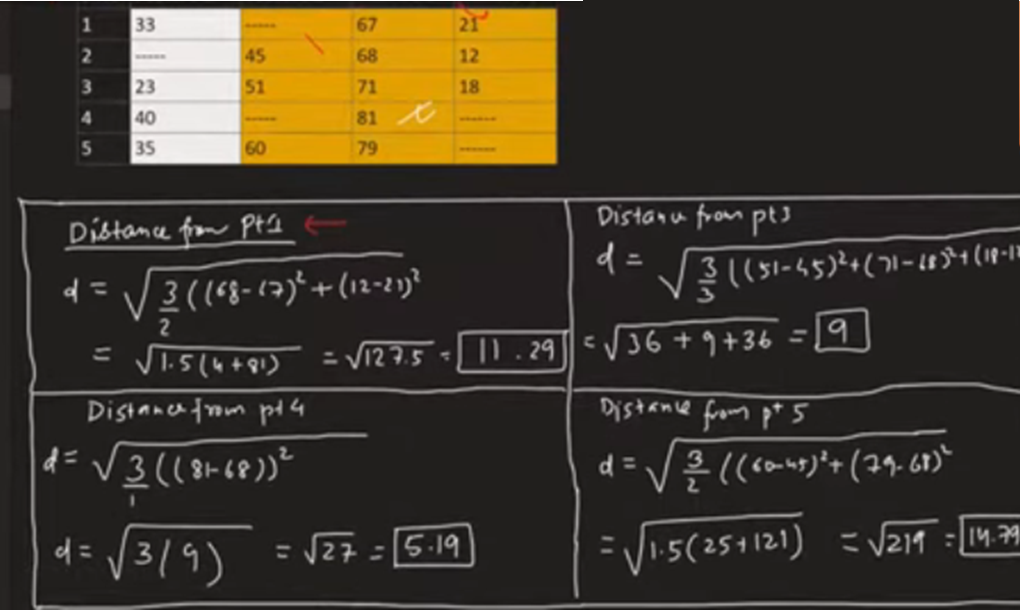

* Needs X_train during production for handling missing values

In [1]:
# Load dataset
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv', usecols=['Age', 'Pclass', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
# Find % of missing values
df.isnull().mean()*100

,0
Survived,0.00000
Pclass,0.00000
Age,19.86532
Fare,0.00000


In [3]:
# Train test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Checking model accuracy by handling missing values through SimpleImputer()

In [4]:
# Apply SimpleImputer
from sklearn.impute import SimpleImputer
si = SimpleImputer()

X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [5]:
# Applying LogisticRegression and checking accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_trf, Y_train)

Y_pred = lr.predict(X_test_trf)
accuracy_score(Y_test, Y_pred)

0.6927374301675978

## Checking model accuracy by handling missing values through KNNImputer()

* When weights = uniform, we give equal weightage to all the neighbours
* When weights = distance, we give more weightage to closer neighbours and less weightage to farther neighbours

In [18]:
# Apply KNNImputer
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, weights='distance')

X_train_trf2 = knn.fit_transform(X_train)
X_test_trf2 = knn.transform(X_test)

In [19]:
# Applying LogisticRegression and checking accuracy => Accuracy is slightly better than last time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_trf2, Y_train)

Y_pred = lr.predict(X_test_trf2)
accuracy_score(Y_test, Y_pred)

0.7039106145251397